# <a id='toc1_'></a>[Exam project](#toc0_)

-----

**Table of contents**<a id='toc0_'></a>    
- [Exam project](#toc1_)    
  - [Import libraries](#toc1_1_)    
  - [Problem 1: Optimal taxation with government consumption](#toc1_2_)    
    - [Question 1](#toc1_2_1_)    
    - [Question 2](#toc1_2_2_)    
    - [Question 3](#toc1_2_3_)    
    - [Question 4](#toc1_2_4_)    
    - [Question 5](#toc1_2_5_)    
    - [Question 6](#toc1_2_6_)    
  - [Problem 2: Labor adjustments costs](#toc1_3_)    
    - [Question 1](#toc1_3_1_)    
    - [Question 2](#toc1_3_2_)    
    - [Question 3](#toc1_3_3_)    
    - [Question 4](#toc1_3_4_)    
    - [Question 5](#toc1_3_5_)    
  - [Problem 3: Global optimizer with refined multi-start](#toc1_4_)    
    - [Question 1](#toc1_4_1_)    
    - [Question 2](#toc1_4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Import libraries](#toc0_)


In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sm
from IPython.display import display
from types import SimpleNamespace

## importing examproject.py as a module "ex"

import examproject as ex
from examproject import analytical_sol, TaxModel
tax = TaxModel()

%load_ext autoreload
%autoreload 2
%matplotlib inline


-----

## <a id='toc1_2_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

### <a id='toc1_2_1_'></a>[Question 1](#toc0_)

Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
ex.analytical_sol(do_print = True)

Eq(L^*, -kappa/(2*wtilde) + sqrt(4*alpha*wtilde**2 + kappa**2*nu)/(2*sqrt(nu)*wtilde))

(-kappa/(2*wtilde) + sqrt(4*alpha*wtilde**2 + kappa**2*nu)/(2*sqrt(nu)*wtilde),
 -kappa/(2*w*(1 - tau)) + sqrt(4*alpha*w**2*(1 - tau)**2 + kappa**2*nu)/(2*sqrt(nu)*w*(1 - tau)))

### <a id='toc1_2_2_'></a>[Question 2](#toc0_)

Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

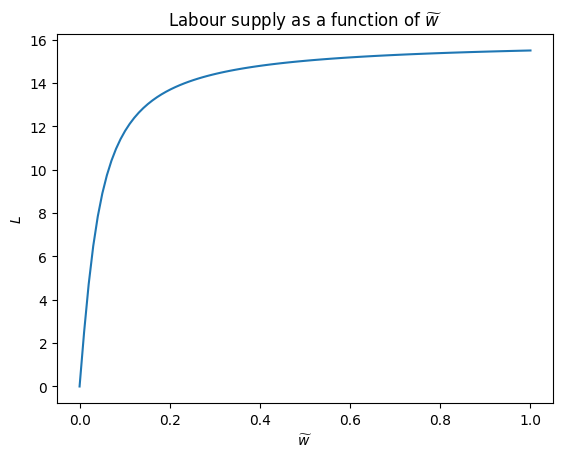

In [5]:
## creating an instance of the class TaxModel for running the labour_plot
tax.set_values()
tax.labour_plot()





### <a id='toc1_2_3_'></a>[Question 3](#toc0_)

We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [7]:
## creating an instance of the class TaxModel for running the tax_plot
tax.set_values()
tax.tax_plot()


<lambdifygenerated-6>:2: RuntimeWarning: divide by zero encountered in divide
  return -1/2*kappa/(w*(1 - tau)) + (1/2)*sqrt(4*alpha*w**2*(1 - tau)**2 + kappa**2*nu)/(sqrt(nu)*w*(1 - tau))
<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in add
  return -1/2*kappa/(w*(1 - tau)) + (1/2)*sqrt(4*alpha*w**2*(1 - tau)**2 + kappa**2*nu)/(sqrt(nu)*w*(1 - tau))
<lambdifygenerated-7>:2: RuntimeWarning: divide by zero encountered in divide
  return -1/2*kappa/(w*(1 - tau)) + (1/2)*sqrt(4*alpha*w**2*(1 - tau)**2 + kappa**2*nu)/(sqrt(nu)*w*(1 - tau))
<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in add
  return -1/2*kappa/(w*(1 - tau)) + (1/2)*sqrt(4*alpha*w**2*(1 - tau)**2 + kappa**2*nu)/(sqrt(nu)*w*(1 - tau))


TypeError: consump_fun() got an unexpected keyword argument 'w'

### <a id='toc1_2_4_'></a>[Question 4](#toc0_)

Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

### <a id='toc1_2_5_'></a>[Question 5](#toc0_)

Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

### <a id='toc1_2_6_'></a>[Question 6](#toc0_)

Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
## insert code here

The code ensures the budget constraint $G = τwL*(1-τ)w$ by iteratively calculating G and L* (labor supply) within the calculate_utility function. Here's how it works:

Using the current tax rate (tau) and the g_solver function, the code determines G. g_solver calculates G based on tau and other parameters, with .root extracting the root of the equation.

The worker_problem function then calculates the optimal labor supply (L*) using G and tau.

By performing these calculations with tau, the code maintains a balanced government budget for any evaluated tau value, satisfying $G = τwL*(1-τ)w$.

To find the tau maximizing utility, the minimize function is employed. With each call to calculate_utility, the budget constraint is enforced, ensuring the resulting tax rate keeps the government budget in balance.

--------

## <a id='toc1_3_'></a>[Problem 2: Labor adjustments costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

### <a id='toc1_3_1_'></a>[Question 1](#toc0_)

Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

### <a id='toc1_3_2_'></a>[Question 2](#toc0_)

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$



The **ex post** value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The **ex ante** expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.

Baseline parameters are: 

$$
\begin{align*}
\rho = 0.90 \\
\iota = 0.01 \\
\sigma_{\epsilon} = 0.10 \\
R = \left(1+0.01\right)^{1/12} 
\end{align*}
$$

Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

### <a id='toc1_3_3_'></a>[Question 3](#toc0_)

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.

Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

### <a id='toc1_3_4_'></a>[Question 4](#toc0_)

Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

### <a id='toc1_3_5_'></a>[Question 5](#toc0_)

Suggest an alternative policy you believe might improve profitability. Implement and test your policy.


------

## <a id='toc1_4_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

### <a id='toc1_4_1_'></a>[Question 1](#toc0_)

Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.


### <a id='toc1_4_2_'></a>[Question 2](#toc0_)

Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

--------